<a href="https://colab.research.google.com/github/manavbahuguna/manavbahuguna/blob/main/Housing_Prices_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10) # default style and setting, size of figure ,

df1 = pd.read_csv("/content/drive/MyDrive/bengaluru_house_prices.csv/bengaluru_house_prices.csv")
df1.head()
df1.shape  # gives size and structure of your data

df1.groupby('area_type')['area_type'].agg('count')# rows with same value is collected

df1.head() # gives top 5 output from data


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df2 = df1.drop(['area_type','society','availability'],axis='columns') # to remove mentioned column/rows adn specify which type
df2.head()
df2.isnull().sum() # groups together all rows with null values and then add them
print(df2)


                       location       size total_sqft  bath  balcony   price
0      Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0      3.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0      3.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0      1.0   95.00
4                      Kothanur      2 BHK       1200   2.0      1.0   51.00
...                         ...        ...        ...   ...      ...     ...
13315                Whitefield  5 Bedroom       3453   4.0      0.0  231.00
13316             Richards Town      4 BHK       3600   5.0      NaN  400.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0      1.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0      1.0  488.00
13319              Doddathoguru      1 BHK        550   1.0      1.0   17.00

[13320 rows x 6 columns]


In [ ]:
df3 = df2.dropna()
# sum
df3.isnull().sum()
df3['size'].unique() # gives unique values which are not repeated in the data
print(df3)
df3['bhk'] = df3['size'].apply(lambda x: int (x.split(' ')[0] )) # using lambda function to split every value in
# size column then only intaking the first value and converting it to int
df3.head()
df3['bhk'].unique()
df3[df3.bhk>20]
df3.total_sqft.unique()
def is_float(x): # function to convert x to float
     try:
          float(x)
     except:
           return False
     return True
df3[df3['total_sqft'].apply(is_float)].head(10) # using apply.() function to apply the above function


                       location       size total_sqft  bath  balcony   price
0      Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07
1              Chikka Tirupathi  4 Bedroom       2600   5.0      3.0  120.00
2                   Uttarahalli      3 BHK       1440   2.0      3.0   62.00
3            Lingadheeranahalli      3 BHK       1521   3.0      1.0   95.00
4                      Kothanur      2 BHK       1200   2.0      1.0   51.00
...                         ...        ...        ...   ...      ...     ...
13314         Green Glen Layout      3 BHK       1715   3.0      3.0  112.00
13315                Whitefield  5 Bedroom       3453   4.0      0.0  231.00
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0      1.0   60.00
13318           Padmanabhanagar      4 BHK       4689   4.0      1.0  488.00
13319              Doddathoguru      1 BHK        550   1.0      1.0   17.00

[12710 rows x 6 columns]


<ipython-input-6-15b0cfcce6b8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int (x.split(' ')[0] )) # using lambda function to split every value in


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,1.0,38.00,2
8,Marathahalli,3 BHK,1310,3.0,1.0,63.25,3
10,Whitefield,3 BHK,1800,2.0,2.0,70.00,3
11,Whitefield,4 Bedroom,2785,5.0,3.0,295.00,4
12,7th Phase JP Nagar,2 BHK,1000,2.0,1.0,38.00,2


In [ ]:
def convert_sqft_to_num(x):
#print(x)
    tokens = x.split('-') #  splitting x using - becoz it is a range
    if len(tokens)==2: # Checking if the splitted x is equal to 2
        return (float(tokens[0])+float(tokens[1]))/2 # converting the first and second value of x to float and then finding their average
    try:
        return float(x)
    except:
        return None

convert_sqft_to_num('2166')
convert_sqft_to_num('34.465Sq .Meter')

In [ ]:
def convert_sqft_to_num(x):
    print(x)
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

convert_sqft_to_num('2166')
convert_sqft_to_num('34.465Sq .Meter')

2166
34.465Sq .Meter


In [ ]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()
df4.loc[30] # using loc function to access 30 rows
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft'] # using arithmatic operator to get the desired output
df5.head()

Streaming output truncated to the last 5000 lines.
850
1650
2400
1900
1367
1210
1190
1175
1140
1095
782
1435
725
1600
3205
720
860
1243
1703
1350
1145
1216
1100
2425
2700
1196
1600
1510
3033
780
1194
1250
1480
1250
1350
620
1630
1020
1410
1181.7
1200
1691
1200
1200
1050
1300
1356
1338
500
1280
1531
11000
620
1605
1917
1200
2750
1400
2625
1100
2041
2070
1110
1650
3565
1033
1142
1500
1502
1176
1063
1100
1044
5400
1216
1425
1200
1345
1248
1830
900
1025
840
1424
2500
1285
1450
1160
2700
2000
1125
3900
1133
1240
1466
3870
1610
1220
1225
1300
1996
1320
1800
1835
1435
1601
1257
3596
1309
1362
1115
1870
1322
1450
1185
1790
3450
1050
664 - 722
5400
775
1000
1183
1282
425
820
1200
1151
1320
1450
1270
1847
1020
2380
1160
2805
1360
1089
1115
1215
1194
1536
1255
1571
900
1517
664
1230
1340
1175
3569
1240
151.11Sq. Yards
1470
1680
1000
1071
3435
3144
1190
1550
1283
1325
1105
1600
400
1100
2099
1365
1485
1250
1290
1170
1328
1232
1180
1350
2400
1020
1410
2159
1200
1255
1074
1200
1170
596 - 861
900
185

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [ ]:

len(df5.location.unique()) # finding length of location column using unique function

df5.location = df5.location.apply(lambda x: x.strip()) # strip is used to remove trailing and leading whitespaces
location_stats = df5.groupby('location')['location'].agg('count') # using groupby function to group the location column
location_stats
len(location_stats[location_stats<=10]) # finding length of location_stats which are less than 10

location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10
len(df5.location.unique())
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())
df5.head(10)





,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.000000


In [ ]:
df5 = df5[~(df5.total_sqft/df5.bhk<300)]
df5.head()
df5.shape


(12055, 8)

In [ ]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12055, 8)

In [ ]:
# df6.price_per_sqft.describe()
 def remove_pps_outliers(df):
   df_out = pd.DataFrame()
for key, subdf in df6.groupby('location'):
  print(key,subdf)
  m = np.mean(subdf.price_per_sqft)   # finding mean of price per sqft
  print("Mean",m)
  st = np.std(subdf.price_per_sqft) # finding standard deviation of price per sqft
  print("ST",st)
  break
  reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))] # selecting the perfect range and removing the outliers
  df_out = pd.concat([df_out,reduced_df],ignore_index=True)
 return df_out
 df7 = remove_pps_outliers(df6)
 df7.shape


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 13)

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)   # finding mean of price per sqft
        st = np.std(subdf.price_per_sqft) # finding standard deviation of price per sqft
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))] # selecting the perfect range and removing the outliers
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out # Indentation corrected to be inside the function

df7 = remove_pps_outliers(df6)
df7.shape

(9848, 8)

In [ ]:
def remove_bhk_outliers(df): # Add df as a parameter
  exclude_indices = np.array([])
  for bhk, bhk_df in df.groupby('bhk'): # Use df instead of location_df
    bhk_stats = {
    'mean' : np.mean(bhk_df.price_per_sqft ),
    'std' : np.std(bhk_df.price_per_sqft),
    'count' : bhk_df.shape[0]
    }
  for bhk, bhk_df in df.groupby('bhk'): # Use df instead of location_df
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
          exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index') # Return modified DataFrame

In [ ]:
df8 =  remove_bhk_outliers(df7)
df8.shape#shape just cannot be used with parenthesis in numpy and pandas


(9848, 8)

Text(0, 0.5, 'Count')

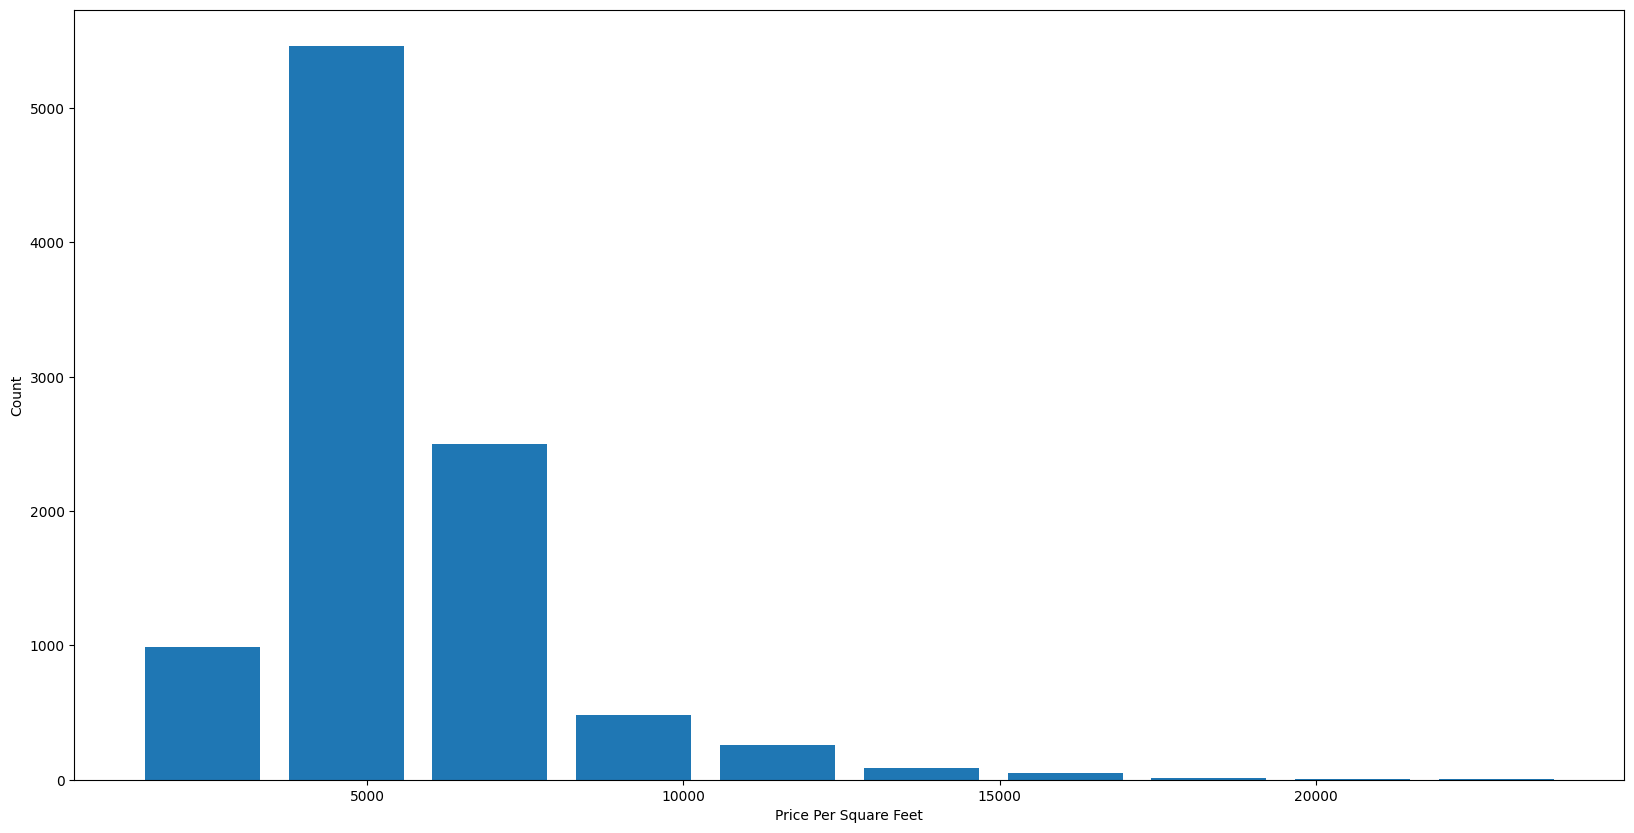

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet") # selecting the x axis

plt.ylabel("Count")  # selecting the y axis

In [ ]:
plot_scatter_chart(df7,'Hebbal')

NameError: name 'plot_scatter_chart' is not defined

In [ ]:
df8.bath.unique()


array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 13.])

In [ ]:
df8[df8.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9269,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

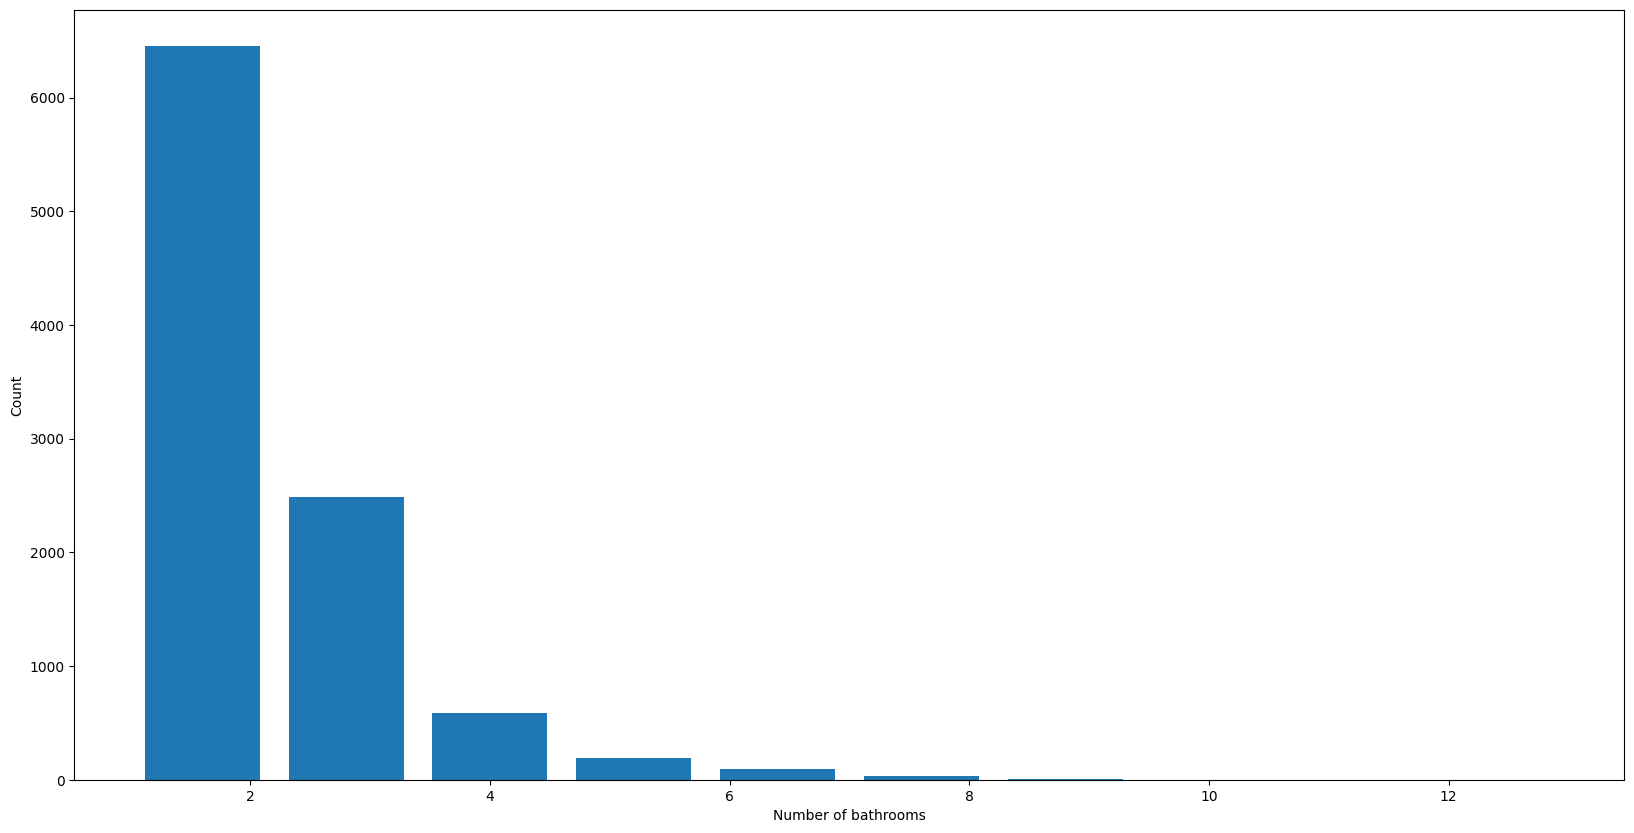

In [ ]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1542,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6450,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8091,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [ ]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(9767, 8)

In [ ]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3


In [ ]:
pd.get_dummies(df10.location)
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df11 =  pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df12.shape

(9767, 242)

In [ ]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8224435347614736

In [ ]:
from time import CLOCK_PROCESS_CPUTIME_ID
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)


array([0.84544857, 0.80131781, 0.83939528, 0.79661814, 0.80409331])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
  algos = {
      'linear_regression' : {
          'model': LinearRegression(),
          'params': {
              'normalize': [True, False]
          }
      },
      'lasso': {
          'model': Lasso ( ),
          'params': {
              'alpha': [1,2],
              'selection': ['random', 'cyclic']
          }
      },
      'decision_tree': {
          'model': DecisionTreeRegressor(),
          'params': {
              'criterion' : ['mse','friedman_mse'],
              'splitter': ['best','random']
          }
      }
  }
  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
      gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
      gs.fit(X,y)
      scores.append({
          'model': algo_name,
          'best_score': gs.best_score_,
          'best_params': gs.best_params_
      })
      return pd.DataFrame(scores,columns=['model','best_score','best_params'])

X = ...
y = ...
find_best_model_using_gridsearchcv(X,y)




TypeError: Singleton array array(Ellipsis, dtype=object) cannot be considered a valid collection.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
# Import the ShuffleSplit class
from sklearn.model_selection import ShuffleSplit
import pandas as pd # Import pandas to create DataFrame

def find_best_model_using_gridsearchcv(X,y):
  algos = {
      'linear_regression' : {
          'model': LinearRegression(),
          'params': {
              'normalize': [True, False]
          }
      },
      'lasso': {
          'model': Lasso ( ),
          'params': {
              'alpha': [1,2],
              'selection': ['random', 'cyclic']
          }
      },
      'decision_tree': {
          'model': DecisionTreeRegressor(),
          'params': {
              'criterion' : ['mse','friedman_mse'],
              'splitter': ['best','random']
          }
      }
  }
  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
      gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
      gs.fit(X,y)
      scores.append({
          'model': algo_name,
          'best_score': gs.best_score_,
          'best_params': gs.best_params_
      })
  return pd.DataFrame(scores,columns=['model','best_score','best_params']) # Move return statement outside the loop
# Replace ... with your actual data
X = ...  # Your features data here (e.g., a NumPy array or pandas DataFrame)
y = ...  # Your target values here (e.g., a NumPy array or pandas Series)

from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X, y):
    # Define the model and parameters to search
    algos = {
"linear_regression": {
            "model": LinearRegression(),
            "params": {"normalize": [True, False]},
        }}

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df7 is your preprocessed DataFrame
# Calculate median price
median_price = df7['price'].median()

# Create the target variable
df7['above_median'] = (df7['price'] > median_price).astype(int)

# Select features and target
features = ['total_sqft', 'bhk', 'price_per_sqft']
X = df7[features]
y = df7['above_median']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9700507614213199
